# Lab13: Seed Dataset – Decision Trees and Random Forests

### Author: Dianna Hummel

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

##### Step A

In [2]:
cols = ['area','perimeter','compact','length', 'width','asym','groove','species']
seed_data = pd.read_csv('seeds.csv', names = cols)
seed_data.head(5)

,area,perimeter,compact,length,width,asym,groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
seed_data.shape

(210, 8)

In [4]:
seed_data.dtypes

area         float64
perimeter    float64
compact      float64
length       float64
width        float64
asym         float64
groove       float64
species        int64
dtype: object

In [5]:
seed_data.groupby(['species']).describe().T

species                  1          2          3
area      count  70.000000  70.000000  70.000000
          mean   14.334429  18.334286  11.873857
          std     1.215704   1.439496   0.723004
          min    11.230000  15.380000  10.590000
          25%    13.750000  17.330000  11.262500
          50%    14.355000  18.720000  11.835000
          75%    15.045000  19.137500  12.425000
          max    17.080000  21.180000  13.370000
asym      count  70.000000  70.000000  70.000000
          mean    2.667403   3.644800   4.788400
          std     1.173901   1.181868   1.336465
          min     0.765100   1.472000   1.661000
          25%     1.826500   2.845500   4.048750
          50%     2.545500   3.609500   4.839000
          75%     3.301000   4.436000   5.467250
          max     6.685000   6.682000   8.456000
compact   count  70.000000  70.000000  70.000000
          mean    0.880070   0.883517   0.849409
          std     0.016191   0.015500   0.021760
          min     0.839200   0.845200   0.808100
          25%     0.868850   0.872525   0.834000
          50%     0.880500   0.882600   0.849350
          75%     0.890400   0.898225   0.861825
          max     0.918300   0.910800   0.897700
groove    count  70.000000  70.000000  70.000000
          mean    5.087214   6.020600   5.116400
          std     0.263699   0.253934   0.162068
          min     4.519000   5.144000   4.745000
          25%     4.924500   5.877500   5.002000
          50%     5.094000   5.981500   5.091500
          75%     5.223500   6.187750   5.228500
          max     5.877000   6.550000   5.491000
length    count  70.000000  70.000000  70.000000
          mean    5.508057   6.148029   5.229514
          std     0.231508   0.268191   0.138015
          min     4.902000   5.363000   4.899000
          25%     5.384500   5.979250   5.136250
          50%     5.534000   6.148500   5.224000
          75%     5.677000   6.312000   5.323750
          max     6.053000   6.675000   5.541000
perimeter count  70.000000  70.000000  70.000000
          mean   14.294286  16.135714  13.247857
          std     0.576583   0.616995   0.340196
          min    12.630000  14.660000  12.410000
          25%    13.960000  15.737500  13.002500
          50%    14.320000  16.210000  13.250000
          75%    14.732500  16.557500  13.470000
          max    15.460000  17.250000  13.950000
width     count  70.000000  70.000000  70.000000
          mean    3.244629   3.677414   2.853771
          std     0.177616   0.185539   0.147516
          min     2.850000   3.231000   2.630000
          25%     3.134250   3.554250   2.725500
          50%     3.243500   3.693500   2.834500
          75%     3.378500   3.804750   2.967000
          max     3.683000   4.033000   3.232000

##### Step B

In [6]:
spec_cat = pd.factorize(seed_data['species'])
Y_seed = spec_cat[0]
Y_seed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [7]:
X_seed = seed_data.drop('species', axis=1)
X_std_seed = StandardScaler().fit_transform(X_seed)
X_std_seed[:5,:]

array([[  1.42097769e-01,   2.15462437e-01,   6.06017918e-05,
          3.04218199e-01,   1.41701823e-01,  -9.86151745e-01,
         -3.83577423e-01],
       [  1.11880257e-02,   8.22375713e-03,   4.28515270e-01,
         -1.68624664e-01,   1.97432229e-01,  -1.78816620e+00,
         -9.22013487e-01],
       [ -1.92066576e-01,  -3.60200562e-01,   1.44238325e+00,
         -7.63637453e-01,   2.08047544e-01,  -6.67479334e-01,
         -1.18919199e+00],
       [ -3.47091272e-01,  -4.75333162e-01,   1.03938133e+00,
         -6.88978054e-01,   3.19508356e-01,  -9.60817955e-01,
         -1.22998260e+00],
       [  4.45257175e-01,   3.30595037e-01,   1.37450924e+00,
          6.66655647e-02,   8.05159035e-01,  -1.56349549e+00,
         -4.75356297e-01]])

In [8]:
kmeans = KMeans (n_clusters=3, random_state = 1)
kmeans.fit (X_std_seed)
Y_model = kmeans.predict (X_std_seed)
Y_model

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1])

In [9]:
Y_test = np.choose (Y_seed, (2,0,1)).astype (int)
Y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [10]:
acc_score = accuracy_score (Y_test, Y_model)
acc_score

0.919047619047619

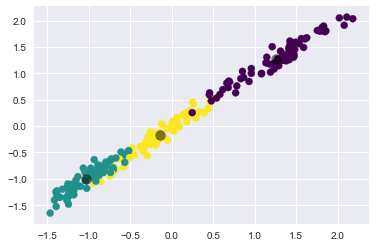

In [11]:
plt.scatter(X_std_seed[:, 0], X_std_seed[:, 1], c = Y_model, s = 50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

[[65  0  5]
 [ 0 66  4]
 [ 2  6 62]]


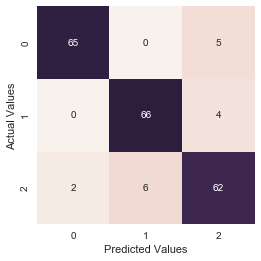

In [12]:
# Class labels: 2=Kama, 0=Rosa, 1=Canadian
mat = confusion_matrix (Y_test, Y_model)
print (mat)
sns.heatmap (mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

##### Step D

In [13]:
Y_seed = seed_data ['species']
X_seed = seed_data.drop (['species'], axis=1)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split (
 X_seed, Y_seed, random_state = 33, test_size = 0.33)

In [15]:
max_depth = [5, 6, 7, 8, 9, 10]
min_split = [2, 3, 4]
min_leaf = [1, 2, 3]
dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 33)
params = {'max_depth': max_depth,
          'min_samples_split': min_split,
          'min_samples_leaf': min_leaf}
search = GridSearchCV (dtc, params, scoring='accuracy')
search.fit (X_train, Y_train)
print ('Best parameters set:')
best_params = search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print ('\t%s: %r' % (param_name,best_params[param_name]))

Best parameters set:
	max_depth: 5
	min_samples_leaf: 1
	min_samples_split: 2


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split (
 X_seed, Y_seed, random_state = 5, test_size = 0.33)

In [17]:
max_depth = [5, 6, 7, 8, 9, 10]
min_split = [2, 3, 4]
min_leaf = [1, 2, 3]
dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 5)
params = {'max_depth': max_depth,
          'min_samples_split': min_split,
          'min_samples_leaf': min_leaf}
search = GridSearchCV (dtc, params, scoring='accuracy')
search.fit (X_train, Y_train)
print ('Best parameters set:')
best_params = search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print ('\t%s: %r' % (param_name,best_params[param_name]))

Best parameters set:
	max_depth: 5
	min_samples_leaf: 1
	min_samples_split: 4


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split (
 X_seed, Y_seed, random_state = 7, test_size = 0.33)
max_depth = [5, 6, 7, 8, 9, 10]
min_split = [2, 3, 4]
min_leaf = [1, 2, 3]
dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 7)
params = {'max_depth': max_depth,
          'min_samples_split': min_split,
          'min_samples_leaf': min_leaf}
search = GridSearchCV (dtc, params, scoring='accuracy')
search.fit (X_train, Y_train)
print ('Best parameters set:')
best_params = search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print ('\t%s: %r' % (param_name,best_params[param_name]))

Best parameters set:
	max_depth: 6
	min_samples_leaf: 1
	min_samples_split: 3


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split (
 X_seed, Y_seed, random_state = 9, test_size = 0.33)
max_depth = [5, 6, 7, 8, 9, 10]
min_split = [2, 3, 4]
min_leaf = [1, 2, 3]
dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 9)
params = {'max_depth': max_depth,
          'min_samples_split': min_split,
          'min_samples_leaf': min_leaf}
search = GridSearchCV (dtc, params, scoring='accuracy')
search.fit (X_train, Y_train)
print ('Best parameters set:')
best_params = search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print ('\t%s: %r' % (param_name,best_params[param_name]))

Best parameters set:
	max_depth: 5
	min_samples_leaf: 1
	min_samples_split: 3


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split (
 X_seed, Y_seed, random_state = 15, test_size = 0.33)
max_depth = [5, 6, 7, 8, 9, 10]
min_split = [2, 3, 4]
min_leaf = [1, 2, 3]
dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 15)
params = {'max_depth': max_depth,
          'min_samples_split': min_split,
          'min_samples_leaf': min_leaf}
search = GridSearchCV (dtc, params, scoring='accuracy')
search.fit (X_train, Y_train)
print ('Best parameters set:')
best_params = search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print ('\t%s: %r' % (param_name,best_params[param_name]))

Best parameters set:
	max_depth: 5
	min_samples_leaf: 3
	min_samples_split: 2


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split (
X_seed, Y_seed, random_state = 33, test_size = 0.33)

In [22]:
dtc = DecisionTreeClassifier (criterion = 'entropy',
random_state = 33, max_depth = 5, 
min_samples_split = 2, min_samples_leaf = 1)
dtc.fit (X_train, Y_train) 
Y_model = dtc.predict(X_test)

In [23]:
acc_score = accuracy_score (Y_test, Y_model)
acc_score

0.95714285714285718

In [24]:
print ('Classification Report')
print (classification_report (Y_test, Y_model))

Classification Report
             precision    recall  f1-score   support

          1       0.89      0.94      0.92        18
          2       0.96      1.00      0.98        24
          3       1.00      0.93      0.96        28

avg / total       0.96      0.96      0.96        70



[[17  1  0]
 [ 0 24  0]
 [ 2  0 26]]


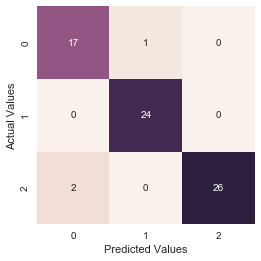

In [25]:
# Class labels: 2=Kama, 0=Rosa, 1=Canadian
mat = confusion_matrix (Y_test, Y_model)
print (mat)
sns.heatmap (mat,square=True,annot=True,cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')

### Kama(0): C1 = 18, Rosa(1): C2 = 24, Canadian(2): C3 = 28
### TC1 =17 , TC2 = 24, TC3 = 26
### FC1C2 - NumberOfRosa ClassifiedAsKama = 0
### FC1C3 - NumberOfCanadian ClassifiedAsKama = 2
### FC2C1 - NumberOfKama ClassifiedAsRosa = 1
### FC2C3 - NumberOfCanadian ClassifiedAsRosa = 0
### FC3C1 - NumberOfKama ClassifiedAsCanadian = 0
### FC3C2 - NumberOfRosa ClassifiedAsCanadian = 0
### TC1R = 17 / 18, TC2R = 24 / 24, TC3R = 26 / 28
### ACC = 67 / 70

In [26]:
X_cols = ['area','perimeter','compact','length','width','asym','groove']
# 1=Kama, 2=Rosa, 3=Canadian
with open ("seed.dot", 'w') as f:
    f = export_graphviz (dtc, out_file=f,
    feature_names=list(X_cols),
    class_names=('Kama','Rosa','Canadian'),
    filled=True,rounded=True,special_characters=True)

##### Step E

In [27]:
max_depth = [5, 6, 7, 8, 9, 10]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
rfc = RandomForestClassifier (n_estimators = 50, 
criterion = 'entropy', random_state = 11)
params = {'max_depth': max_depth,'min_samples_split': min_split,'min_samples_leaf': min_leaf}
search = GridSearchCV (rfc, params, scoring='accuracy')
search.fit (X_seed, Y_seed)
print ('Best parameters set:') 
best_params = search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print ('\t%s: %r' % (param_name, best_params[param_name]))

Best parameters set:
	max_depth: 5
	min_samples_leaf: 1
	min_samples_split: 2


In [28]:
rfc = RandomForestClassifier (criterion = 'entropy',
n_estimators = 50, random_state = 11, max_depth = 5,
min_samples_split = 2, min_samples_leaf = 1)
rfc.fit (X_seed, Y_seed) 
Y_model = rfc.predict (X_seed)

In [29]:
acc_score = accuracy_score (Y_seed, Y_model)
acc_score

0.99523809523809526

In [30]:
print ('Classification Report')
print (classification_report (Y_seed, Y_model))

Classification Report
             precision    recall  f1-score   support

          1       1.00      0.99      0.99        70
          2       1.00      1.00      1.00        70
          3       0.99      1.00      0.99        70

avg / total       1.00      1.00      1.00       210



[[69  0  1]
 [ 0 70  0]
 [ 0  0 70]]


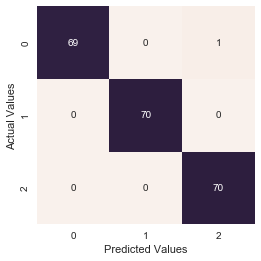

In [31]:
# Class labels: 2=Kama, 0=Rosa, 1=Canadian
mat = confusion_matrix (Y_seed, Y_model)
print (mat)
sns.heatmap (mat,square=True,annot=True,cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')

####Kama(0): C1 = 70, Rosa(1): C2 = 70, Canadian(2): C3 = 70
####TC1 = 69, TC2 = 70, TC3 = 70
####FC1C2 - NumberOfRosa ClassifiedAsKama = 0
####FC1C3 - NumberOfCanadian ClassifiedAsKama = 0
####FC2C1 - NumberOfKama ClassifiedAsRosa = 0
####FC2C3 - NumberOfCanadian ClassifiedAsRosa = 0
####FC3C1 - NumberOfKama ClassifiedAsCanadian = 1
####FC3C2 - NumberOfRosa ClassifiedAsCanadian = 0
####TC1R = 69 / 70, TC2R = 70 / 70, TC3R = 70 / 70
####ACC = 69 / 70